# WELCOME TO C964 CAPSTONE PROJECT


This project will provide salaries reported for 2022-2023 in the tech industry. Below you will find a variety of images to represent that data. At the end of this project a company can use the drop down selection to filter salaries by company size, providing a company with relevent salary bands for their company.

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

df = pd.read_csv("datasalaries.csv")
us_salaries = df[df["company_location"] == "US"]


## PLOTS TO REPRESENT SALARIES BASED ON EXPERICE LEVEL
Each plot represents an experience level and is then color coded based on company size

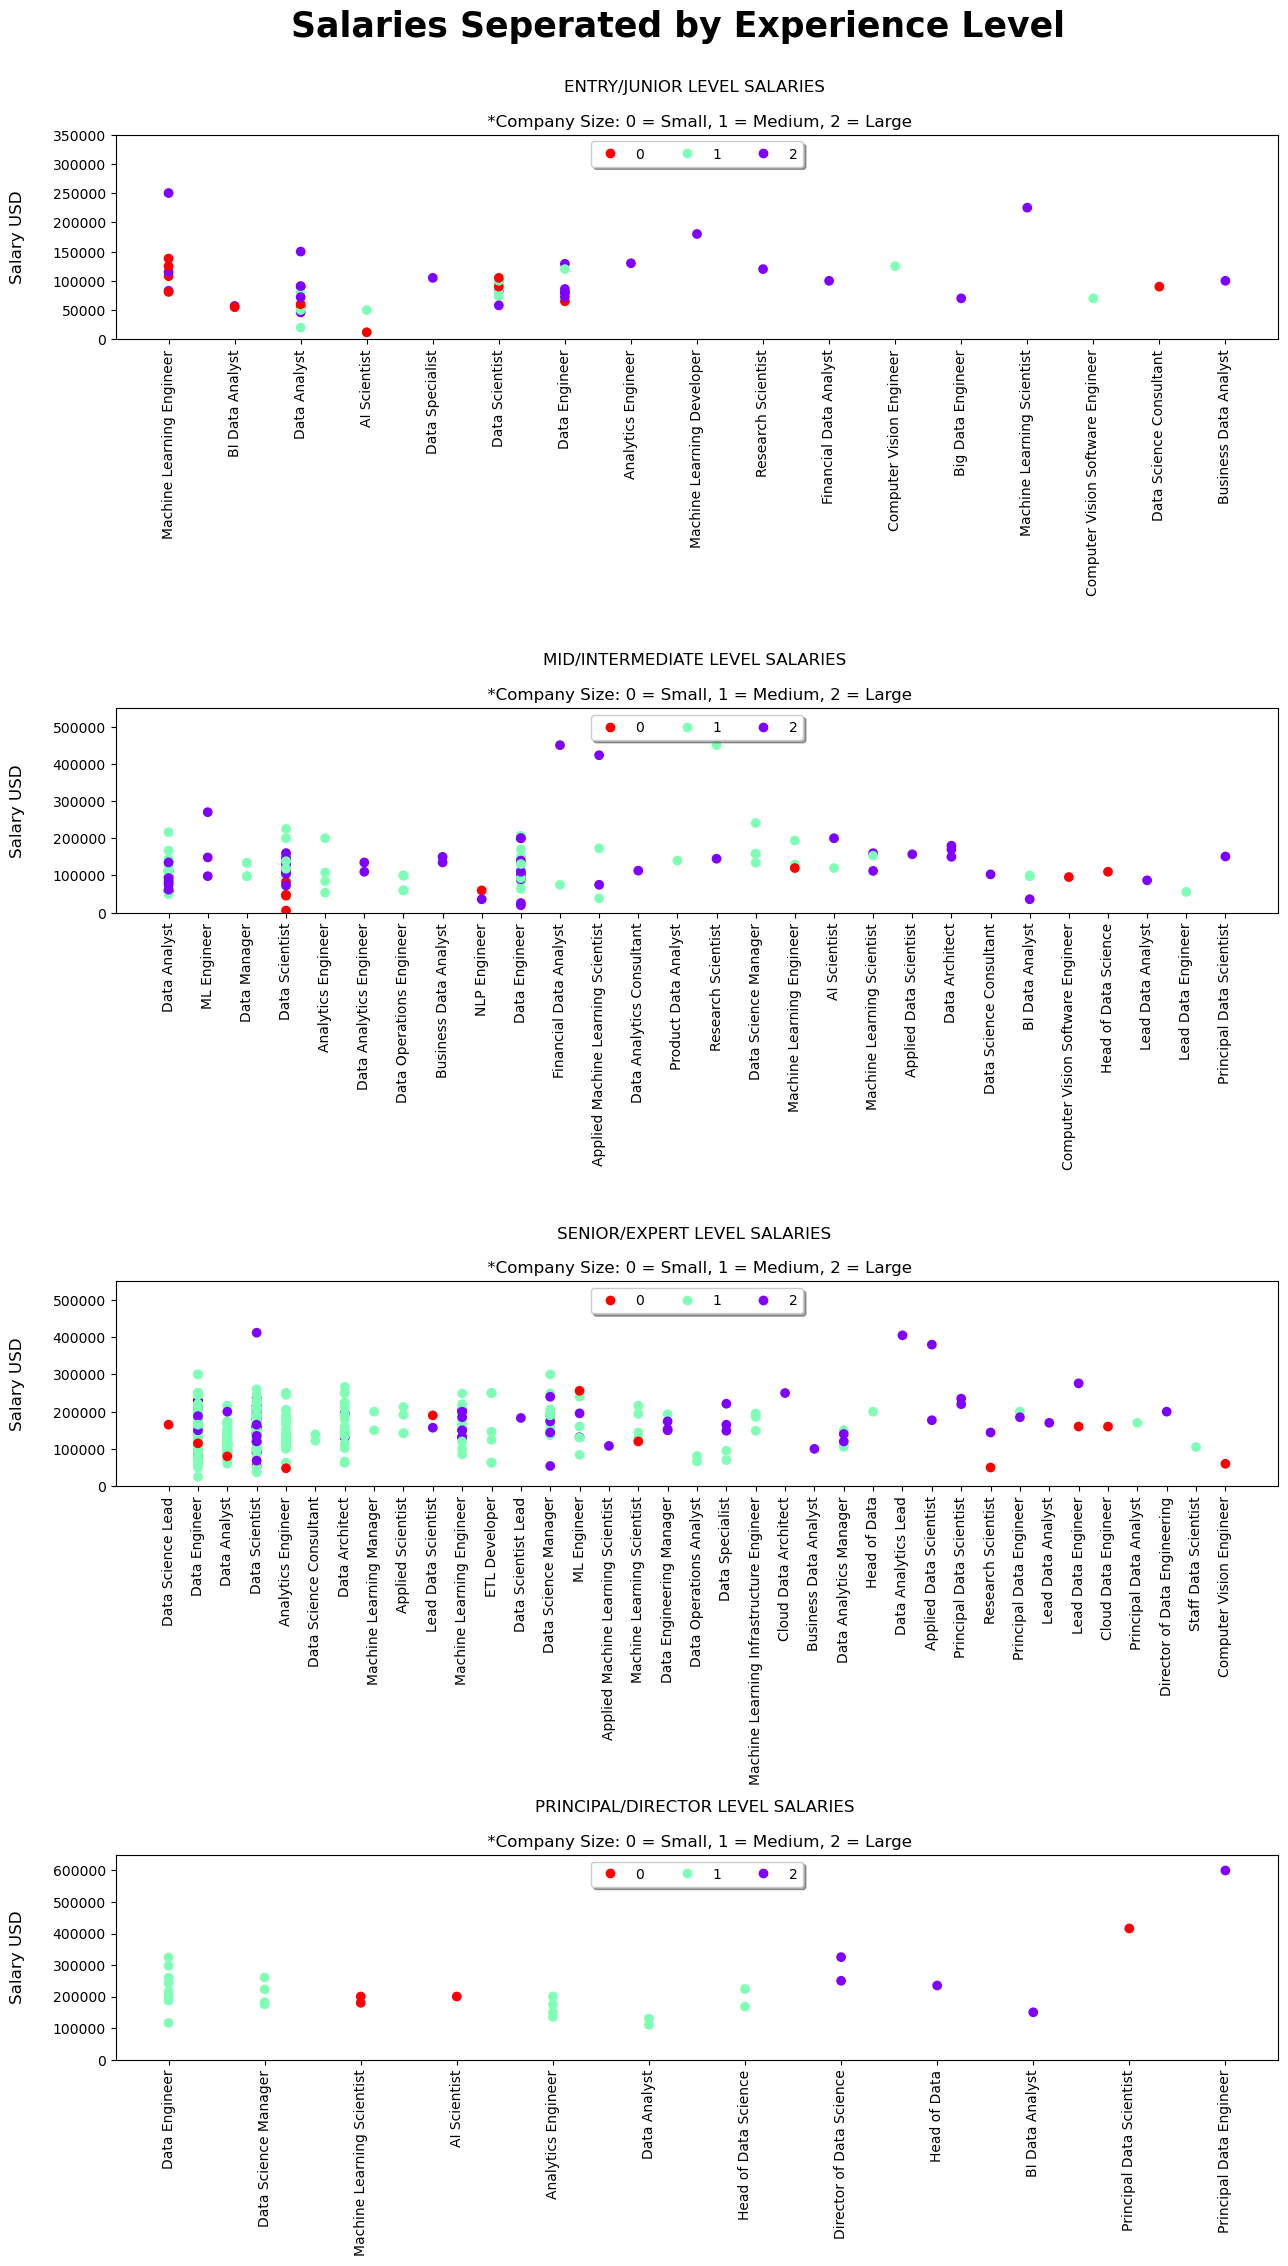

In [52]:
salaries_experience = us_salaries.replace({'experience_level': {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}})
salaries_csize = salaries_experience.replace({'company_size': {'S': 0, 'M': 1, 'L': 2}})
entry_level = salaries_csize[salaries_csize["experience_level"] == 0]
mid_level = salaries_csize[salaries_csize["experience_level"] == 1]
senior_level = salaries_csize[salaries_csize["experience_level"] == 2]
executive_level = salaries_csize[salaries_csize["experience_level"] == 3]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4,
                                    ncols=1,
                                    figsize=(15,25),
                                    )
  
scatter = ax0.scatter(x = entry_level["job_title"],
                      y = entry_level["salary_in_usd"],
                      c = entry_level['company_size'],
                      cmap = "rainbow_r")

ax0.tick_params(axis = 'x', rotation =90)

ax0.set(title= "ENTRY/JUNIOR LEVEL SALARIES \n \n *Company Size: 0 = Small, 1 = Medium, 2 = Large",
       ylim=[0, 350000]
       );
# ax0.title.set_color('darkblue')
ax0.set_ylabel('Salary USD', labelpad=20.0, fontsize=12)
ax0.legend(*scatter.legend_elements(), loc='upper center', 
            ncol=3, frameon=True, shadow=True)

scatter = ax1.scatter(x = mid_level["job_title"],
                      y = mid_level["salary_in_usd"],
                      c = mid_level['company_size'],
                      cmap = "rainbow_r")
ax1.tick_params(axis = 'x', rotation =90)
ax1.set(title= "MID/INTERMEDIATE LEVEL SALARIES \n \n *Company Size: 0 = Small, 1 = Medium, 2 = Large",
       ylim=[0, 550000]
       );
# ax1.title.set_color('darkblue')
ax1.set_ylabel('Salary USD', labelpad=20.0, fontsize=12)
ax1.legend(*scatter.legend_elements(), loc='upper center', 
            ncol=3, frameon=True, shadow=True)


scatter = ax2.scatter(x = senior_level["job_title"],
                      y = senior_level["salary_in_usd"],
                      c = senior_level['company_size'],
                      cmap = "rainbow_r")
ax2.tick_params(axis = 'x', rotation =90)
ax2.set(title= "SENIOR/EXPERT LEVEL SALARIES \n \n *Company Size: 0 = Small, 1 = Medium, 2 = Large",
        ylim=[0, 550000]
       );
# ax2.title.set_color('darkblue')
ax2.set_ylabel('Salary USD', labelpad=20.0, fontsize=12)
ax2.legend(*scatter.legend_elements(), loc='upper center', 
            ncol=3, frameon=True, shadow=True)
# plt.ylabel('Salary USD', fontdict=font, labelpad=20.0)

scatter = ax3.scatter(x = executive_level["job_title"],
                      y = executive_level["salary_in_usd"],
                      c = executive_level['company_size'],
                      cmap = "rainbow_r")
ax3.tick_params(axis = 'x', rotation =90)
ax3.set(title= "PRINCIPAL/DIRECTOR LEVEL SALARIES \n \n *Company Size: 0 = Small, 1 = Medium, 2 = Large",
        ylim=[0, 650000]
       );
# ax3.title.set_color('blue')
ax3.set_ylabel('Salary USD', labelpad=20.0, fontsize=12)
ax3.legend(*scatter.legend_elements(), loc='upper center', 
            ncol=3, frameon=True, shadow=True)

plt.subplots_adjust(hspace = 1.8)

fig.suptitle("Salaries Seperated by Experience Level", fontsize=25, fontweight="bold", 
             y = 0.93)


plt.show();


## PIE CHARTS TO VISUALIZE THE NUMBER OF SALARIES REPORTED
The first seperates salaries reported based on experience level, and the second seperates salaries reported based on company size.

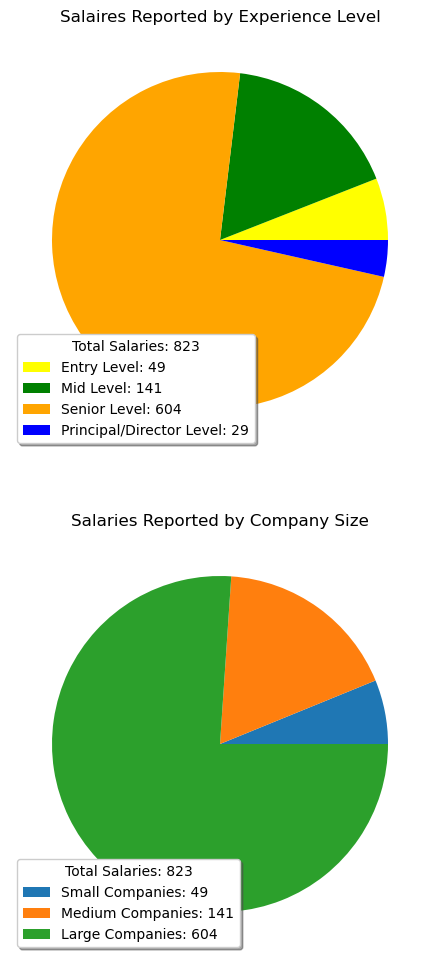

In [3]:
a = len(salaries_experience[salaries_experience["experience_level"] == 0])
b =len(salaries_experience[salaries_experience["experience_level"] == 1])
c = len(salaries_experience[salaries_experience["experience_level"] == 2])
d = len(salaries_experience[salaries_experience["experience_level"] == 3])
e = len(salaries_experience[salaries_experience["company_size"] == "S"])
f= len(salaries_experience[salaries_experience["company_size"] == "M"])
g = len(salaries_experience[salaries_experience["company_size"] == "L"])


e_amount= [a, b, c, d]
e_labels = ['Entry Level:' + ' ' + str(a), 'Mid Level:' + ' ' + str(b), 'Senior Level:' + ' ' + str(c),
          'Principal/Director Level:'+ ' ' + str(d)]
e_colors = ['yellow', 'green', 'orange', 'blue']
s_amount= [a, b, c]
s_labels = ['Small Companies:' + ' ' + str(a), 'Medium Companies:' + ' ' + str(b), 
          'Large Companies:' + ' ' + str(c)]

fig, (ax0, ax1) = plt.subplots(2, figsize=(12, 12))

ax0.pie(e_amount, colors=e_colors)
ax0.legend(e_labels, title="Total Salaries: 823", frameon=True, shadow=True)
ax0.set_title("Salaires Reported by Experience Level");

ax1.pie(s_amount)
ax1.set_title("Salaries Reported by Company Size")
ax1.legend(s_labels, title="Total Salaries: 823", frameon=True, shadow=True, loc='lower left');

## FILTER SALARIES BY SIZE OF COMPANY
Use the drop down to select to size of the company.

In [4]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

small_company = salaries_experience[salaries_experience["company_size"] == "S"]
medium_company = salaries_experience[salaries_experience["company_size"] == "M"]
large_company = salaries_experience[salaries_experience["company_size"] == "L"]

# output = widgets.Output()
# questions_list = ['Small', 'Medium', 'Large']
# dropdown_company = widgets.Dropdown(options= questions_list)

def myfunction(select):
    
    names=['Entry Level', 'Mid Level', 'Senior Level','Principal/Director Level']
    
    if select == "small company":
        x = small_company['salary_in_usd'].groupby(small_company['experience_level'])
        x.groups.keys()
        list(x.groups)
        plt.suptitle("Smalll Company Salaries")
        plt.hist(x.get_group(0), edgecolor='black', alpha=0.5, color='blue')
        plt.hist(x.get_group(1), edgecolor='black', alpha=0.5, color = 'yellow')
        plt.hist(x.get_group(2), edgecolor='black', alpha=0.2, color='green')
        plt.hist(x.get_group(3), edgecolor='black', alpha=0.5, color = 'orange')
        plt.xlabel("Salary in USD", size='x-large')
        plt.ylabel("Number of Salaries Reported", size='x-large');
        plt.legend(names)
        plt.xlim(0, 500000)
        plt.xticks()
        
    elif select == "medium company":
        x = medium_company['salary_in_usd'].groupby(medium_company['experience_level'])
        x.groups.keys()
        list(x.groups)
        plt.suptitle("Medium Company Salaries")
        plt.hist(x.get_group(0), edgecolor='black', alpha=1, color='orange')
        plt.hist(x.get_group(1), edgecolor='black', alpha=0.3, color = 'yellow')
        plt.hist(x.get_group(2), edgecolor='black', alpha=0.2, color='green')
        plt.hist(x.get_group(3), edgecolor='black', alpha=0.5, color = 'blue')
        plt.xlabel("Salary in USD", size='x-large')
        plt.ylabel("Number of Salaries Reported", size='x-large');
        plt.legend(names)
        plt.xlim(0, 500000)
    elif select == "large company":
        x = large_company['salary_in_usd'].groupby(large_company['experience_level'])
        x.groups.keys()
        list(x.groups)
        plt.suptitle("Large Company Salaries")
        plt.hist(x.get_group(0), edgecolor='black', alpha=1, color='orange')
        plt.hist(x.get_group(1), edgecolor='black', alpha=0.3, color = 'yellow')
        plt.hist(x.get_group(2), edgecolor='black', alpha=0.2, color='green')
        plt.hist(x.get_group(3), edgecolor='black', alpha=0.5, color = 'blue')
        plt.xlabel("Salary in USD", size='x-large')
        plt.ylabel("Number of Salaries Reported", size='x-large');
        plt.legend(names)
        plt.tight_layout()
        plt.xlim(0, 500000)

    else:
        return select;

label = widgets.Label(values='Select a Company Size to Filter')
interact(myfunction, select=['small company','medium company', 'large company']);


interactive(children=(Dropdown(description='select', options=('small company', 'medium company', 'large compan…

## MACHINE LEARNING COMPONENT
Uses random forest regressor to predict salaries. The salary data is broken down into test and training sets. The accuracy score is then provided as output.

In [5]:
salary_data = pd.read_csv("datasalaries.csv")
us_salary_data = salary_data[salary_data["company_location"] == "US"]
us_salary_df = pd.DataFrame(us_salary_data)

# Split data into X/y
X = us_salary_df.drop([ "salary_in_usd", "salary_currency", "employee_residence"], axis=1)
y = us_salary_df["salary_in_usd"]

#Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

# Turn column values into integers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["employment_type","company_size", "job_title", "experience_level",
                        "remote_ratio", "company_location"]
one_hot = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([("one_hot", 
                                 one_hot,
                                 categorical_features)],
                                 remainder ="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.fit_transform(X_test)

# Ensemble model (and ensemble is a combination of small models to try and make predictions
# beter than a single model)

# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                     y, 
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)  # R^2 - coefficeint of determination


0.9170462704845072

## COMPARES THE PREDICTIONS TO THE TRUTH

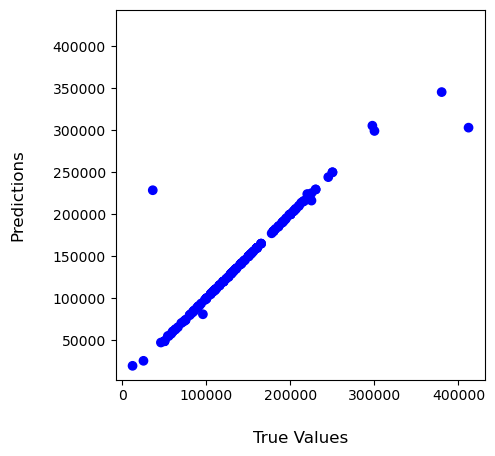

In [20]:
y_preds = model.predict(X_test)
# np.mean(y_preds == y_test)

#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

plt_mae = plt.scatter(y_test, y_preds, marker="o", linestyle = '', c = 'blue')

plt_mae.axes.set_xlim(0, 450000)
plt_mae.axes.set_ylabel('Predictions', labelpad=20.0, fontsize=12)
plt_mae.axes.set_xlabel('True Values', labelpad=20.0, fontsize=12)
plt_mae.axes.axis('equal')
plt_mae.axes.axis('square');

## PROVIDES THE MEAN AVERAGE BETWEEN THE TEST DATA AND PREDICTIONS

In [21]:
mean_absolute_error(y_test, y_preds)

2491.534666666666

## PREDICTS THE SALARY BASED ON THE EXPERIENCE LEVEL
Enter the experience level and the model will predict a salary.

In [49]:
from sklearn.linear_model import LinearRegression

x = np.asanyarray(salaries_experience[["experience_level"]])
y = np.asanyarray(salaries_experience[["salary_in_usd"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size = 0.2,
                                                random_state = 42)

l_model = LinearRegression()
l_model.fit(xtrain, ytrain)
l_model.score(xtest, ytest)

l_model.score(xtest, ytest) # R^2 - coefficeint of determination

0.1349111199362255

In [47]:
ypreds = l_model.predict(xtest)
mean_absolute_error(ytest, ypreds)

42955.392971929694

In [48]:
# l_model.fit(xtrain, ytrain)
print("0=Entry Level, 1=Mid Level, 2=Senior Level, 3=Director Level")
enter = int(input("Enter Experience Level:"))

features = np.array([[enter]])
print("Predicted Salary = ", l_model.predict(features))

0=Entry Level, 1=Mid Level, 2=Senior Level, 3=Director Level
Enter Experience Level:2
Predicted Salary =  [[156590.58036934]]
